# Statistical Tests in Python

python에서 다양한 통계 분석을 할 수 있는 방법들을 가장 대표적인 것만 모아놨습니다. `statsmodels`, `scipy` 라이브러리를 이용했습니다.

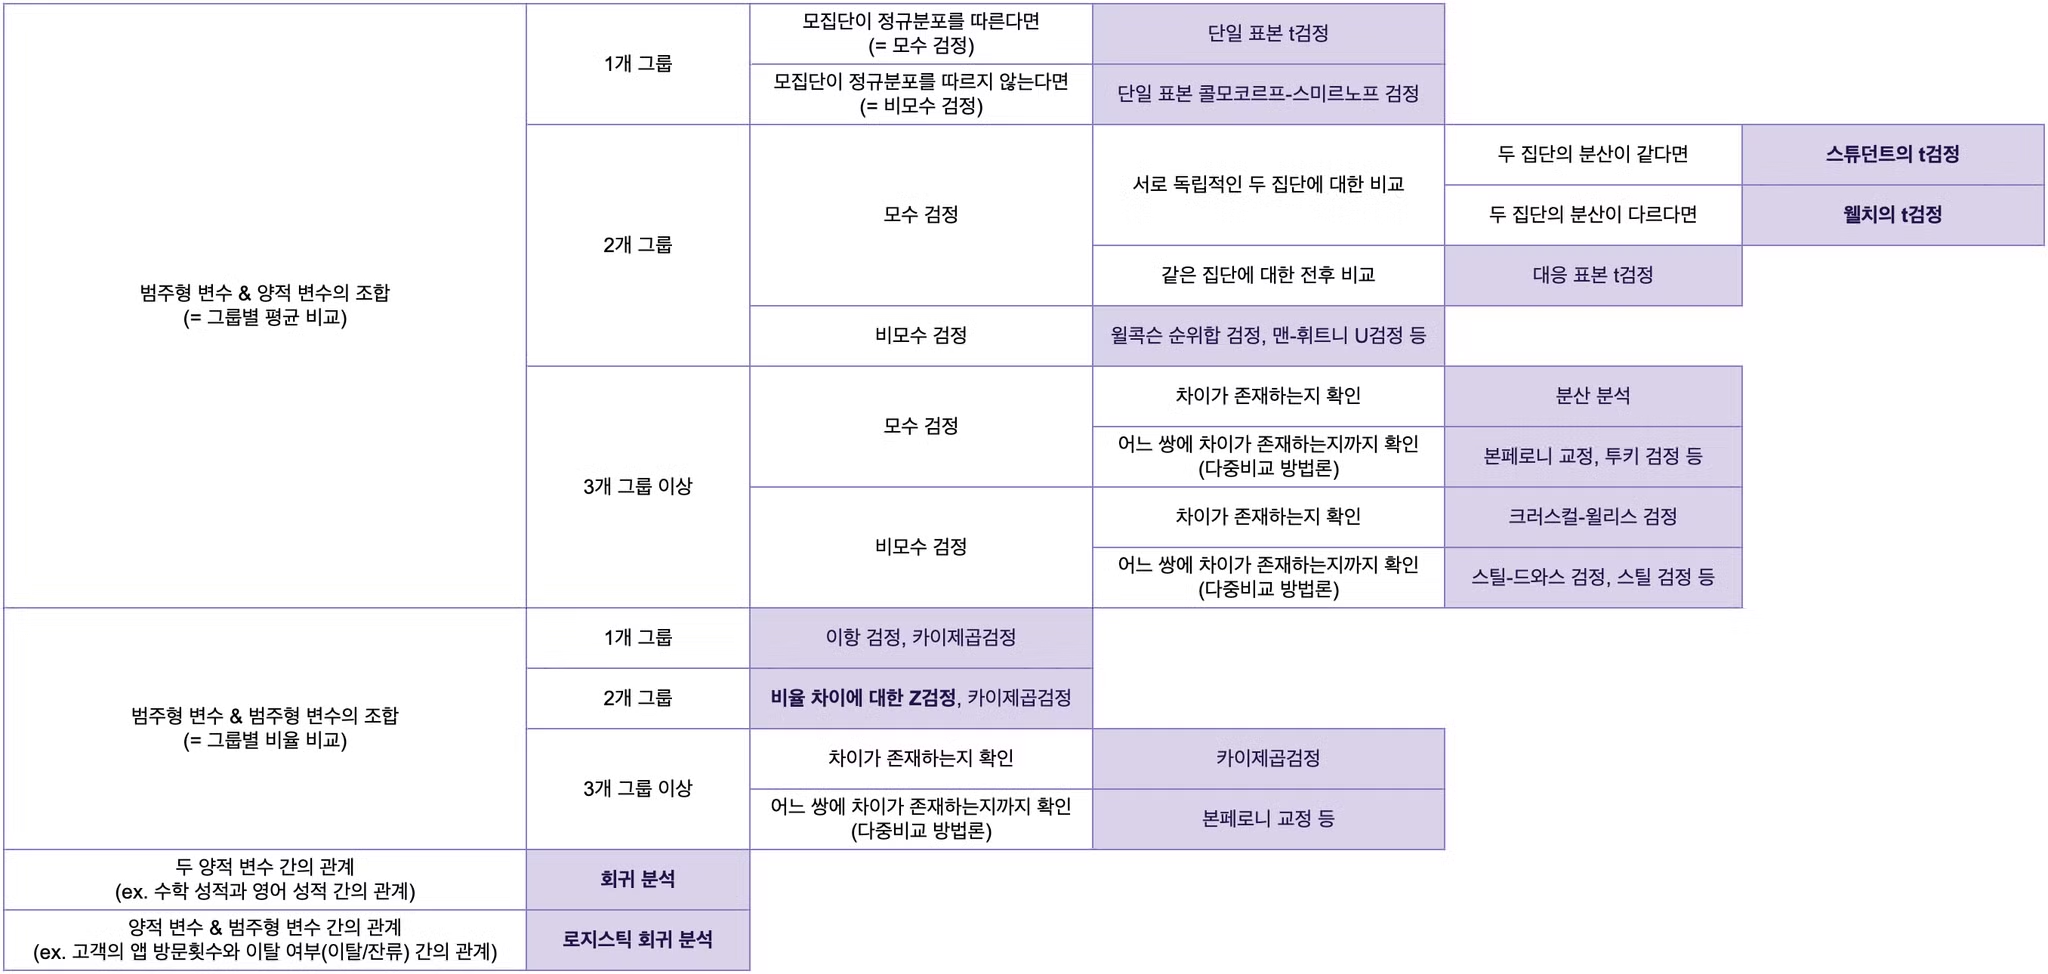

- 위의 표를 참고해서, 다양한 방법들을 사용할 수 있을 것입니다.
- 그러나, 우리는 비모수 검정을 따로 사용하지 않을 거예요! 표본 데이터가 30개 이상이면, CLT에 따라 표본 평균의 분포가 정규분포에 근사한다고 배웠었죠?
    - 대부분의 경우 데이터의 개수가 30개 이상이고, 모수 방법을 사용하더라도, 충분히 적합한 결과가 나오게 됩니다!

- 그래서, 아래의 꼭 필요한 모수 검정 방법들을 python을 이용해서 구현하는 방법들을 보고 이번 프로젝트에서 참고하시면 될 거 같습니다!

1. t-검정 : F검정
2. z-검정
3. ANOVA(분산분석) : levene's 검정

In [ ]:
!pip3 install statsmodels

## 1. F-Test (F-검정)
- 서로 다른 두 분포의 등분산성을 검정할 때!

In [20]:
import statsmodels.api as sm
from scipy.stats import f
import numpy as np
import pandas as pd

# Data Example
group1 = [2.3, 1.9, 3.1, 2.7, 2.8]
group2 = [1.8, 1.6, 2.0, 2.2, 2.5]

In [21]:
# Variance of Two Groups
group1_var = np.var(group1, ddof=1)
group2_var = np.var(group2, ddof=1)

# Degrees of Freedom
df1 = len(group1) - 1
df2 = len(group2) - 1

# Calculate F-Statistic
f_stat = group1_var / group2_var
print(f"F-Statistic: {f_stat}")

# Calculate p-value
p_value = f.sf(f_stat, df1, df2)  # sf: Survival function (1 - cdf)
print(f"P-Value: {p_value}")

F-Statistic: 1.7868852459016402
P-Value: 0.2938628129452472


<결과 해석>
-	F-statistic: 그룹 간 분산의 비율.
-	p-value: F-statistic이 주어진 자유도에서 나올 확률.
-   p-value > 0.05: 두 그룹의 분산이 유사하다고 볼 수 있음(등분산성 만족).
-	p-value ≤ 0.05: 두 그룹의 분산이 다르다고 볼 수 있음(등분산성 위반).

## 1. t-Test (t-검정)

- 서로 다른 두 분포의 평균 차이를 검정할 때!
    - 등분산 - student
    - 등분산X - welch

- 등분산인, student t-검정

In [22]:
# 등분산 Perform t-Test
t_stat, p_value, df = sm.stats.ttest_ind(group1, group2, usevar='pooled')

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {df}")


T-Statistic: 2.0708054698878984
P-Value: 0.07213873195454257
Degrees of Freedom: 8.0


- 등분산이 아닐 때, welch's t-검정

In [23]:
# Perform Welch's t-Test (Unequal Variance)
t_stat, p_value, df = sm.stats.ttest_ind(group1, group2, usevar='unequal')

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {df}")

T-Statistic: 2.0708054698878984
P-Value: 0.0749192293803091
Degrees of Freedom: 7.409306499166772


## 2. z-Test (z-검정)
- 서로 다른 두 분포의 비율 차이를 검정할 때!

In [24]:
import statsmodels.stats.weightstats as smw

# Data Example
data1 = [30, 35, 40, 45, 50]
data2 = [32, 36, 41, 46, 51]

# Perform z-Test
z_stat, p_value = smw.ztest(data1, data2)

print(f"Z-Statistic: {z_stat}")
print(f"P-Value: {p_value}")


Z-Statistic: -0.24474510493440182
P-Value: 0.8066538011960374


## 4. Levene Test
- 세 그룹 이상의 등분산을 확인할 때

In [25]:
from scipy.stats import levene

# Perform Levene's Test
stat, p_value = levene(group1, group2)

print(f"Levene Statistic: {stat}")
print(f"P-Value: {p_value}")


Levene Statistic: 0.2352941176470587
P-Value: 0.6406295692605116


-	Levene Statistic: 분산 차이의 크기를 나타냅니다.
-	P-value:
-	p-value > 0.05: 등분산성을 만족
-	p-value ≤ 0.05: 등분산성을 만족하지 않음

## 5. ANOVA (Analysis of Variance)

- one-way : 하나의 요인에 따른 세 그룹 간의 평균 차이 비교

In [11]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import pandas as pd

# Data Preparation
data = pd.DataFrame({
    'value': [2.1, 2.3, 2.5, 2.8, 3.0, 2.2, 2.6, 2.7, 3.1, 3.2],
    'group': ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B']
})

# Perform General ANOVA
print("일반 ANOVA 실행 결과:")
model = ols('value ~ group', data=data).fit()
anova_table = anova_lm(model)
print(anova_table)

일반 ANOVA 실행 결과:
           df  sum_sq  mean_sq         F    PR(>F)
group     1.0   0.121    0.121  0.817568  0.392306
Residual  8.0   1.184    0.148       NaN       NaN


<결과 해석>
-	PR(>F) 값: 0.392306
-	이는 그룹 간 평균 차이가 통계적으로 유의미한지 평가하는 p값입니다.
-	**F-통계량(F-statistic)**에 기반하여 계산된 값입니다.

In [12]:
from statsmodels.stats.oneway import anova_oneway
import pandas as pd

# Data Preparation
data = pd.DataFrame({
    'value': [2.1, 2.3, 2.5, 2.8, 3.0, 2.2, 2.6, 2.7, 3.1, 3.2],
    'group': ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B']
})

# Prepare Data for Welch ANOVA
group_a = data[data['group'] == 'A']['value']
group_b = data[data['group'] == 'B']['value']

# Perform Welch ANOVA
print("Welch ANOVA 실행 결과:")
welch_anova = anova_oneway(
    [group_a, group_b],
    use_var='unequal'  # 등분산성 불만족
)
print(welch_anova)

Welch ANOVA 실행 결과:
statistic = 0.8175675675675691
pvalue = 0.39256913608498856
df = (1.0, np.float64(7.918658773555066))
df_num = 1.0
df_denom = 7.918658773555066
nobs_t = 10.0
n_groups = 2
means = [2.54 2.76]
nobs = [5. 5.]
vars_ = [0.133 0.163]
use_var = unequal
welch_correction = True
tuple = (np.float64(0.8175675675675691), np.float64(0.39256913608498856))


In [ ]:
from scipy.stats import levene
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.oneway import anova_oneway
import pandas as pd

# Data Preparation
data = pd.DataFrame({
    'value': [2.1, 2.3, 2.5, 2.8, 3.0, 2.2, 2.6, 2.7, 3.1, 3.2],
    'group': ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B']
})

# Perform Levene's Test
stat, p_value = levene(
    data[data['group'] == 'A']['value'],
    data[data['group'] == 'B']['value']
)

if p_value > 0.05:
    print("등분산성을 만족합니다. 일반 ANOVA 사용:")
    # 일반 ANOVA
    model = ols('value ~ group', data=data).fit()
    anova_table = anova_lm(model)
    print(anova_table)
else:
    print("등분산성을 만족하지 않습니다. Welch ANOVA 사용:")
    # Welch ANOVA
    group_a = data[data['group'] == 'A']['value']
    group_b = data[data['group'] == 'B']['value']
    welch_anova = anova_oneway(
        [group_a, group_b],
        use_var='unequal'
    )
    print(welch_anova)

- two-way : 2개의 요인에 따른 세 그룹 이상의 평균 차이 비교

In [ ]:
from scipy.stats import levene
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Levene Test for Homogeneity of Variances
stat, p_value = levene(
    data[data['group'] == 'A']['value'],
    data[data['group'] == 'B']['value'],
    data[data['group'] == 'C']['value']
)

if p_value > 0.05:
    print("등분산성을 만족합니다. 일반 Two-way ANOVA 수행.")
    # Two-way ANOVA with interaction
    model = ols('value ~ group * condition', data=data).fit()
    anova_table = anova_lm(model)
    print(anova_table)
else:
    print("등분산성을 만족하지 않습니다. Welch ANOVA 개별 비교 수행 필요.")
    
    # Here, you would need to perform Welch comparisons for each group/condition combination.

- 등분산 two-way ANOVA

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import pandas as pd

# 예시 데이터 준비
data = pd.DataFrame({
    'value': [4.5, 5.2, 6.0, 8.3, 7.1, 6.7, 5.4, 9.0, 8.2, 7.4, 
              6.5, 7.3, 8.1, 9.2, 8.7, 7.6, 6.3, 6.8, 7.7, 8.9],
    'group': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'C', 'C', 
              'C', 'C', 'A', 'A', 'B', 'B', 'C', 'C', 'C', 'C'],
    'condition': ['X', 'X', 'X', 'Y', 'X', 'X', 'X', 'Y', 'X', 'X', 
                  'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Z', 'Z', 'Z', 'Z']
})

"""	1.	종속 변수: 측정된 값(예: 점수, 반응 시간 등).
	2.	첫 번째 독립 변수: 그룹을 나타내는 범주형 변수(예: group).
	3.	두 번째 독립 변수: 조건을 나타내는 범주형 변수(예: condition).
"""

# Perform Two-way ANOVA with Interaction
model = ols('value ~ group * condition', data=data).fit()
anova_table = anova_lm(model)

print("Two-way ANOVA 결과:")
print(anova_table)

Two-way ANOVA 결과:
                   df     sum_sq   mean_sq         F    PR(>F)
group             2.0   1.124083  0.562042  0.809365  0.466358
condition         2.0  12.613750  6.306875  9.082179  0.003403
group:condition   4.0  11.441645  2.860411  4.119119  0.022643
Residual         13.0   9.027500  0.694423       NaN       NaN


<결과 해석>
1.	group:
    -	그룹 간의 평균 차이를 나타냅니다.
    -	PR(>F): p-value가 0.05보다 작으면 그룹 간 평균 차이가 통계적으로 유의미합니다.
2.	condition:
    -	조건 간의 평균 차이를 나타냅니다.
    -	PR(>F): p-value가 0.05보다 작으면 조건 간 평균 차이가 유의미합니다.
3.	group:condition:
    -	그룹과 조건 간 상호작용 효과를 나타냅니다.
    -	PR(>F): p-value가 0.05보다 작으면 상호작용 효과가 유의미합니다.

- 이분산 two-way Welch ANOVA
    - 직접 지원X
    1. 대안: 그룹별 분해 및 독립 Welch ANOVA 수행
    2. 대안: 새로운 변수 생성, 상호작용 효과를 평가하는 대안

1. 대안: 그룹별 분해 및 독립 Welch ANOVA 수행

In [ ]:
from statsmodels.stats.oneway import anova_oneway
import pandas as pd

# Example Data Preparation
data = pd.DataFrame({
    'value': [4.5, 5.2, 6.0, 8.3, 7.1, 6.7, 5.4, 9.0, 8.2, 7.4, 
              6.5, 7.3, 8.1, 9.2, 8.7, 7.6, 6.3, 6.8, 7.7, 8.9],
    'group': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'C', 'C', 
              'C', 'C', 'A', 'A', 'B', 'B', 'C', 'C', 'C', 'C'],
    'condition': ['X', 'X', 'X', 'Y', 'X', 'X', 'X', 'Y', 'X', 'X', 
                  'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Z', 'Z', 'Z', 'Z']
})

# Function to perform Welch ANOVA for each condition
conditions = data['condition'].unique()

for condition in conditions:
    print(f"\nWelch ANOVA for condition: {condition}")
    subset = data[data['condition'] == condition]
    groups = [subset[subset['group'] == g]['value'] for g in subset['group'].unique()]
    result = anova_oneway(groups, use_var='unequal')  # Welch ANOVA
    print(result)


Welch ANOVA for condition: X
statistic = 7.869203670276235
pvalue = 0.05982792628021572
df = (2.0, np.float64(3.1400479356494717))
df_num = 2.0
df_denom = 3.1400479356494717
nobs_t = 8.0
n_groups = 3
means = [5.23333333 6.4        7.8       ]
nobs = [3. 3. 2.]
vars_ = [0.56333333 0.79       0.32      ]
use_var = unequal
welch_correction = True
tuple = (np.float64(7.869203670276235), np.float64(0.05982792628021572))

Welch ANOVA for condition: Y
statistic = 4.509838938610851
pvalue = 0.12820383434378746
df = (2.0, np.float64(2.914000600950488))
df_num = 2.0
df_denom = 2.914000600950488
nobs_t = 8.0
n_groups = 3
means = [8.53333333 8.43333333 6.9       ]
nobs = [3. 3. 2.]
vars_ = [0.34333333 0.54333333 0.32      ]
use_var = unequal
welch_correction = True
tuple = (np.float64(4.509838938610851), np.float64(0.12820383434378746))

Welch ANOVA for condition: Z
statistic = nan
pvalue = nan
df = (0.0, np.float64(nan))
df_num = 0.0
df_denom = nan
nobs_t = 4.0
n_groups = 1
means = [7.425]
nobs 

/Users/jaechanjo/Desktop/code_it/4기_강의자료/codeit_practice_venv/lib/python3.12/site-packages/statsmodels/stats/oneway.py:511: RuntimeWarning: invalid value encountered in scalar divide
  statistic = np.dot(weights, (means - meanw_t)**2) / (n_groups - 1.)
/Users/jaechanjo/Desktop/code_it/4기_강의자료/codeit_practice_venv/lib/python3.12/site-packages/statsmodels/stats/oneway.py:515: RuntimeWarning: invalid value encountered in scalar divide
  tmp = ((1 - w_rel)**2 / (nobs - 1)).sum() / (n_groups**2 - 1)


2. 대안 : 새로운 변수 생성, 상호작용 효과를 평가하는 대안

In [ ]:
# Create a combined variable for group and condition
data['group_condition'] = data['group'] + "_" + data['condition']

print(data['group_condition'].unique())

# Perform Welch ANOVA on the combined variable
groups = [data[data['group_condition'] == g]['value'] for g in data['group_condition'].unique()]
result = anova_oneway(groups, use_var='unequal')  # Welch ANOVA
print(result)

['A_X' 'A_Y' 'B_X' 'B_Y' 'C_X' 'C_Y' 'C_Z']
statistic = 4.883558237866172
pvalue = 0.0497719526202787
df = (6.0, np.float64(5.092983451066021))
df_num = 6.0
df_denom = 5.092983451066021
nobs_t = 20.0
n_groups = 7
means = [5.23333333 8.53333333 6.4        8.43333333 7.8        6.9
     7.425     ]
nobs = [3. 3. 3. 3. 2. 2. 4.]
vars_ = [0.56333333 0.34333333 0.79       0.54333333 0.32       0.32
     1.3025    ]
use_var = unequal
welch_correction = True
tuple = (np.float64(4.883558237866172), np.float64(0.0497719526202787))


## 6. Regression Analysis (회귀 분석)

In [ ]:

# Regression Data Preparation
data = pd.DataFrame({
    'x1': [1, 2, 3, 4, 5],
    'x2': [2, 4, 6, 8, 10],
    'y': [1.2, 2.4, 3.0, 3.8, 5.1]
})

# Create Regression Model
X = data[['x1', 'x2']]
X = sm.add_constant(X)  # Add Constant Term
y = data['y']

# Fit Model
model = sm.OLS(y, X).fit()

# Display Results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     186.7
Date:                Mon, 18 Nov 2024   Prob (F-statistic):           0.000848
Time:                        11:59:29   Log-Likelihood:                 1.9167
No. Observations:                   5   AIC:                            0.1667
Df Residuals:                       3   BIC:                           -0.6144
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3400      0.223      1.523      0.2

/Users/jaechanjo/Desktop/code_it/4기_강의자료/codeit_practice_venv/lib/python3.12/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
